<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/RandomForestClassificationAndRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Bootstrap Sample 1:
Chosen indices: [np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(6), np.int64(6), np.int64(7), np.int64(7), np.int64(9), np.int64(10), np.int64(10), np.int64(10), np.int64(12), np.int64(12)]
Number of unique chosen indices: 8
OOB indices: [0, 1, 5, 8, 11, 13]
Number of OOB samples: 6
Percentage of OOB: 42.9%

Bootstrap Sample 2:
Chosen indices: [np.int64(1), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(4), np.int64(5), np.int64(5), np.int64(7), np.int64(7), np.int64(7), np.int64(11), np.int64(11), np.int64(13)]
Number of unique chosen indices: 8
OOB indices: [0, 6, 8, 9, 10, 12]
Number of OOB samples: 6
Percentage of OOB: 42.9%

Bootstrap Sample 100:
Chosen indices: [np.int64(0), np.int64(1), np.int64(3), np.int64(3), np.int64(4), np.int64(7), np.int64(7), np.int64(7), np.int64(8), np.int64(10), np.int64(11), np.int64(11), np.int64(11), np.int64(13)]
Number of unique chosen indices: 9
OOB indices: [2, 5, 6, 9, 12]
Number of OOB samples:

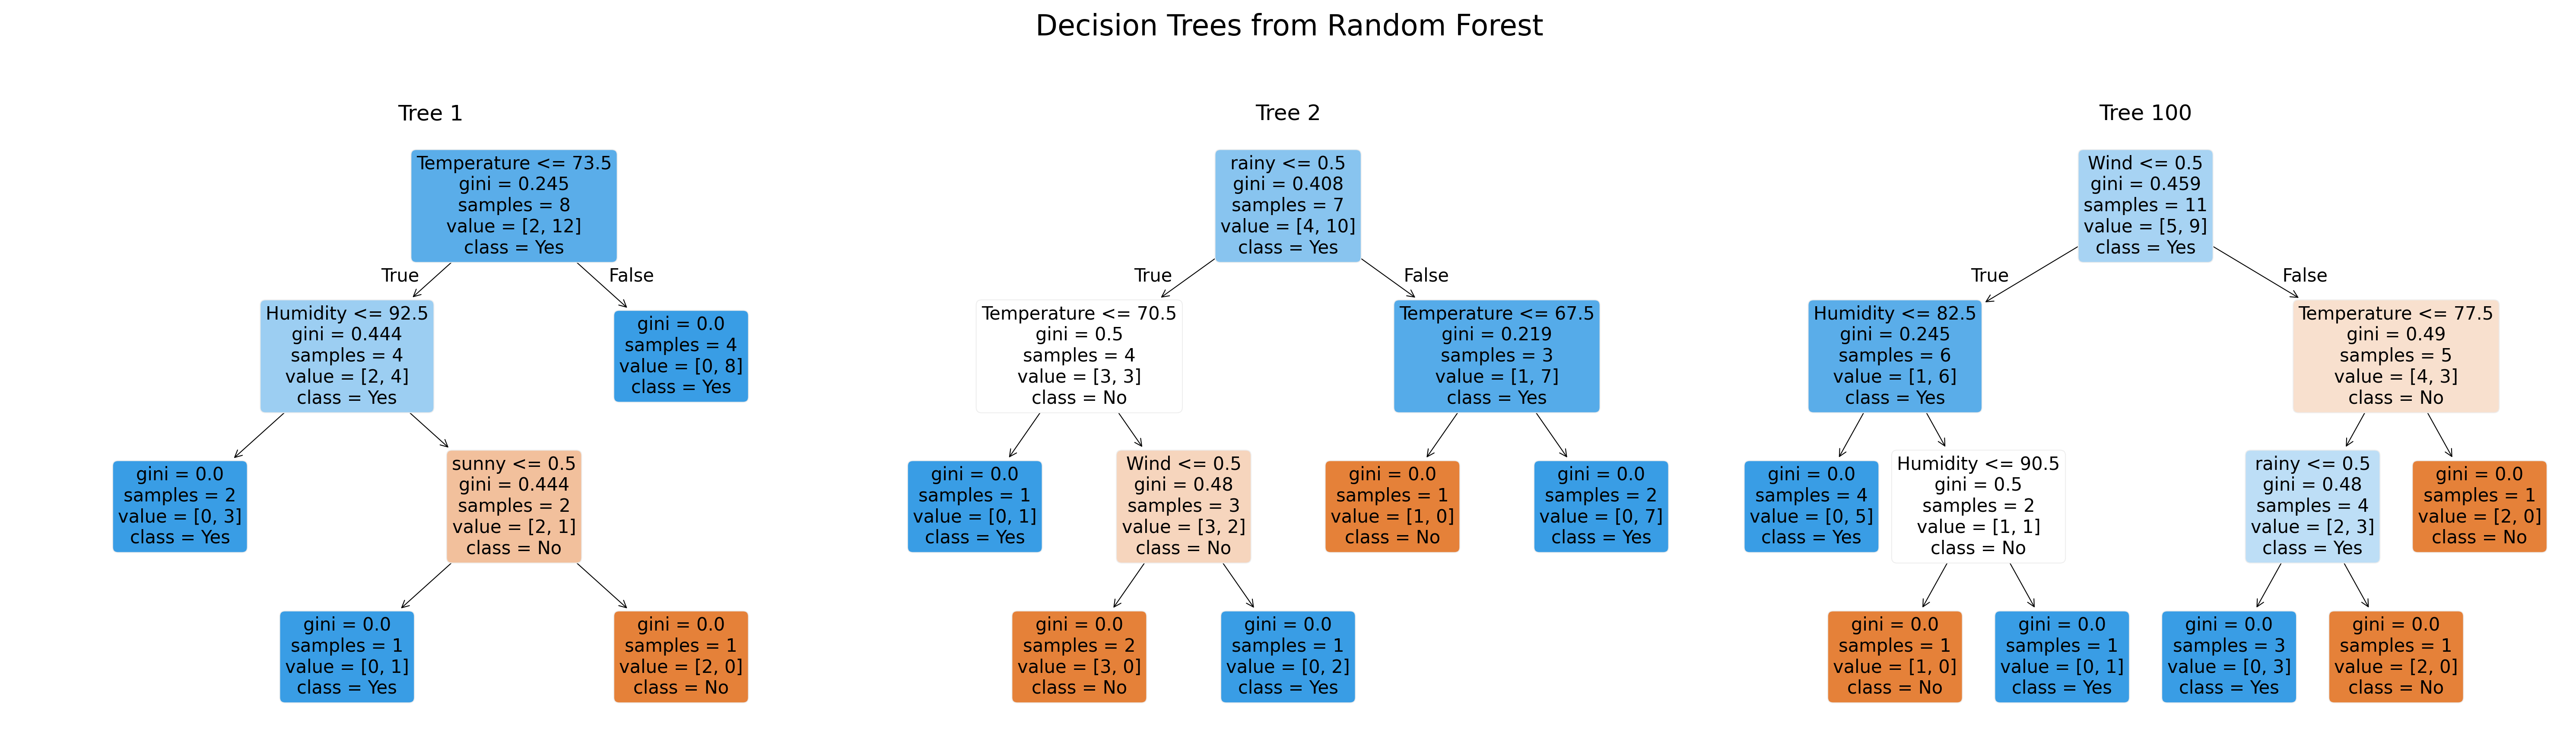

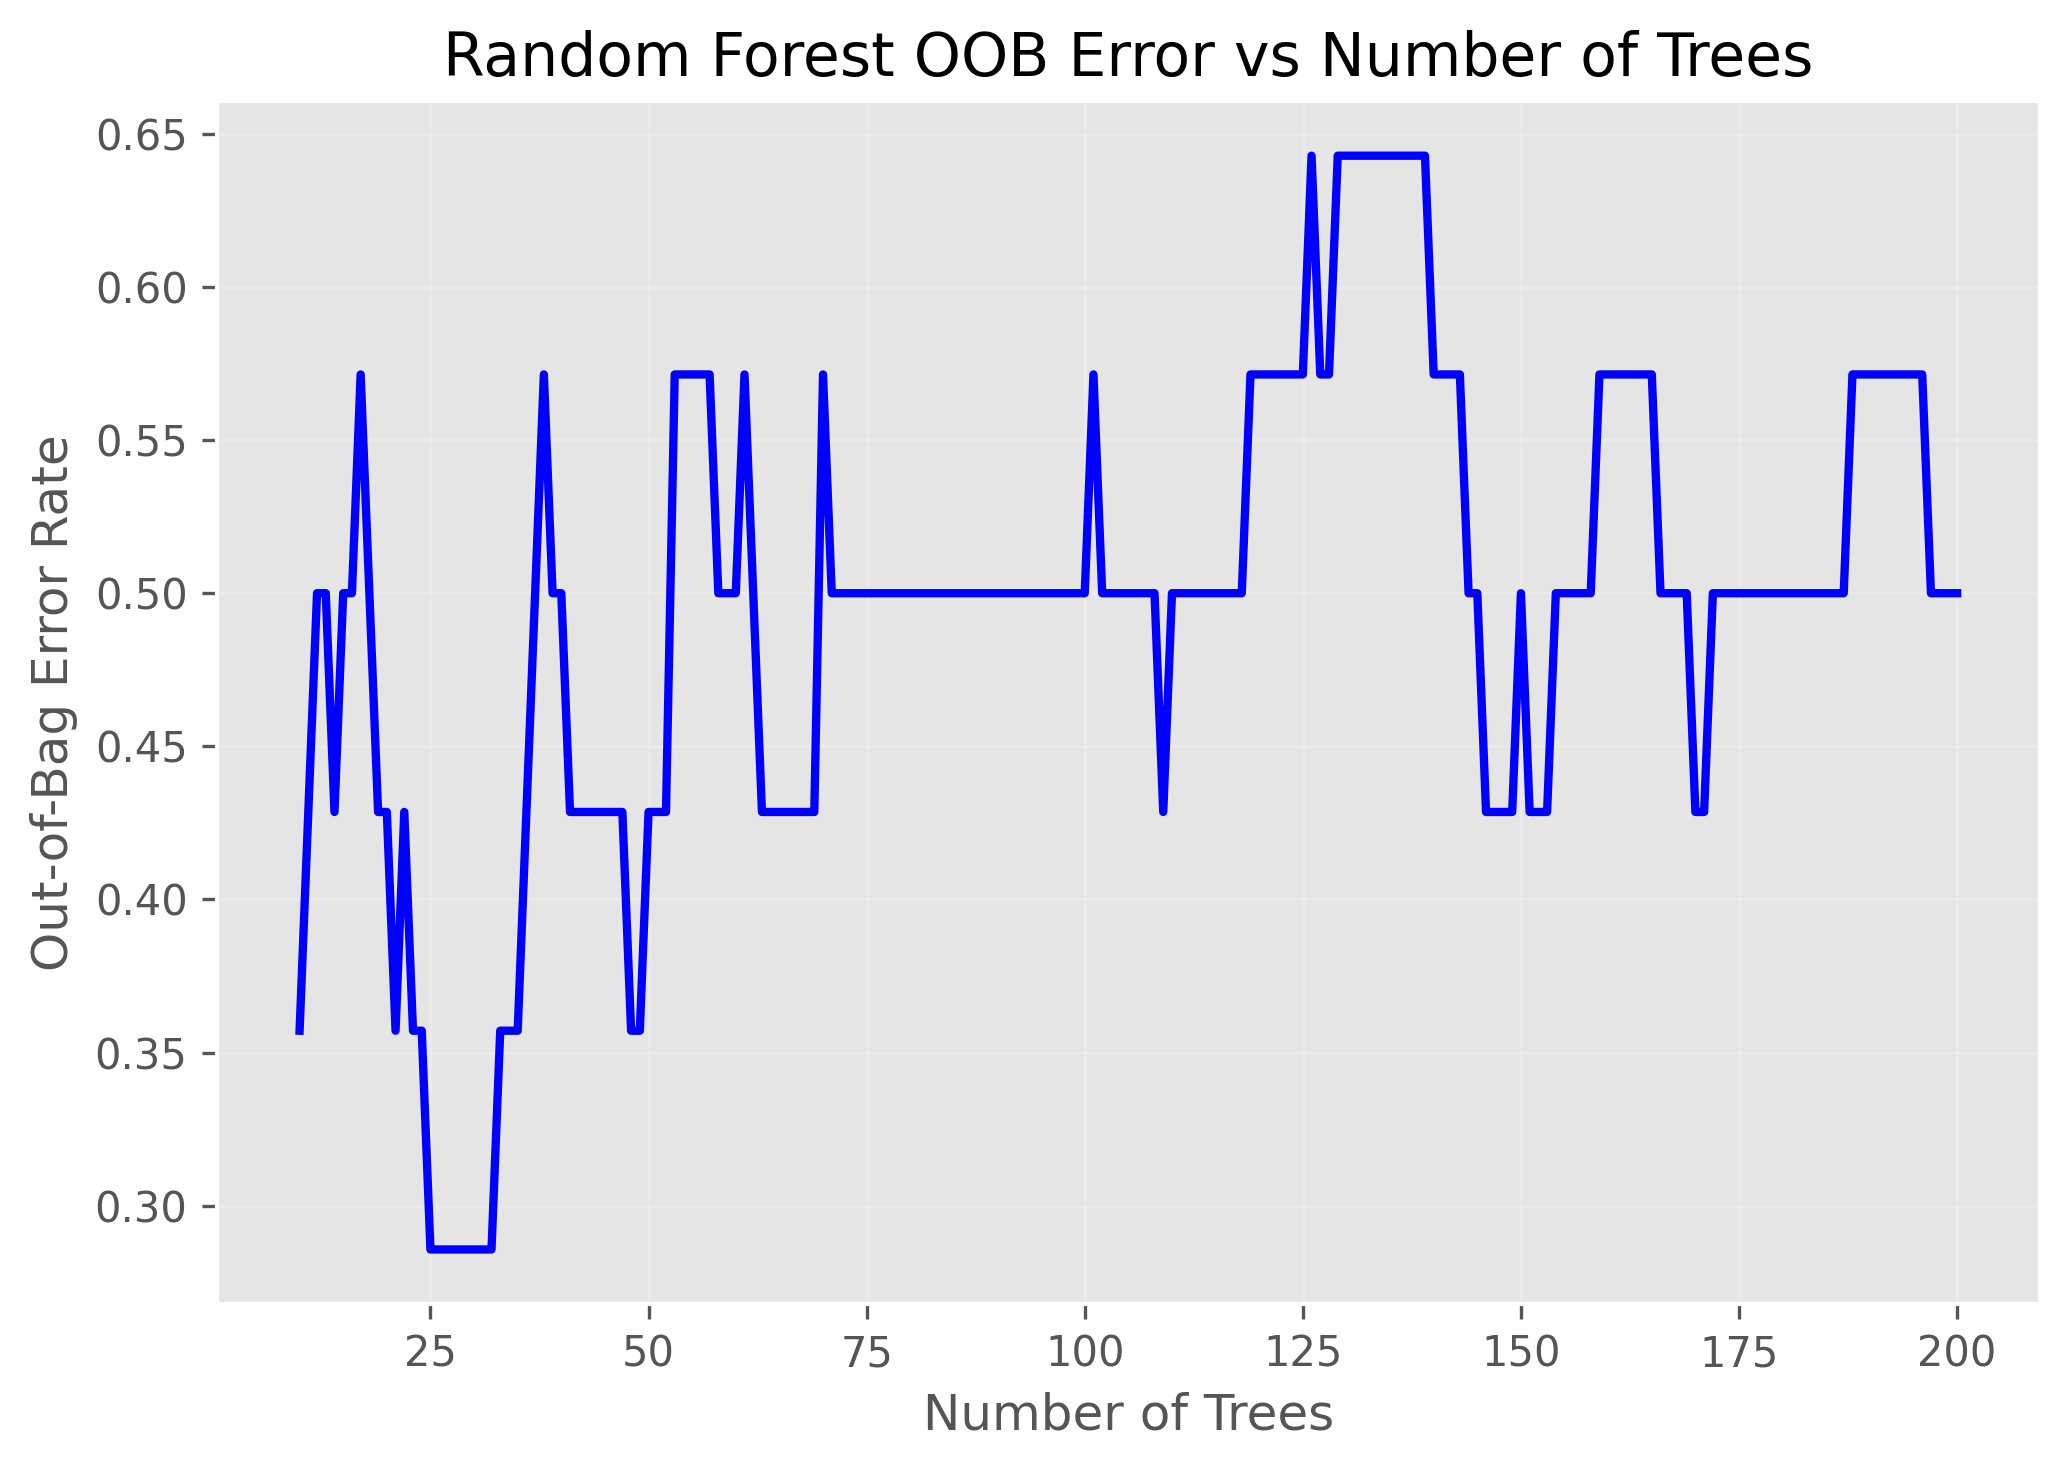

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Create and prepare dataset
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast',
                'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy',
                'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast',
                'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0,
                   72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0,
                   88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0,
                 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0,
                 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True,
             True, False, True, True, False, False, True, False, True, True, False,
             True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
             'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
             'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}

# Prepare data
df = pd.DataFrame(dataset_dict)
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# Rearrange columns
column_order = ['sunny', 'overcast', 'rainy', 'Temperature', 'Humidity', 'Wind', 'Play']
df = df[column_order]

# Prepare features and target
X,y = df.drop('Play', axis=1), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)
# import ipdb
# ipdb.set_trace()
# print(df)

# Generate 100 bootstrap samples
n_samples = len(X_train)
n_bootstraps = 100
all_bootstrap_indices = []
all_oob_indices = []

np.random.seed(42)  # For reproducibility
for i in range(n_bootstraps):
    # Generate bootstrap sample indices
    bootstrap_indices = np.random.choice(n_samples, size=n_samples, replace=True)

    # Find OOB indices
    oob_indices = list(set(range(n_samples)) - set(bootstrap_indices))

    all_bootstrap_indices.append(bootstrap_indices)
    all_oob_indices.append(oob_indices)

# Print details for samples 1, 2, and 100
samples_to_show = [0, 1, 99]

for i in samples_to_show:
    print(f"\nBootstrap Sample {i+1}:")
    print(f"Chosen indices: {sorted(all_bootstrap_indices[i])}")
    print(f"Number of unique chosen indices: {len(set(all_bootstrap_indices[i]))}")
    print(f"OOB indices: {sorted(all_oob_indices[i])}")
    print(f"Number of OOB samples: {len(all_oob_indices[i])}")
    print(f"Percentage of OOB: {len(all_oob_indices[i])/n_samples*100:.1f}%")

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
np.random.seed(42)  # For reproducibility
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Create visualizations for trees 1, 2, and 100
trees_to_show = [0, 1, 99]  # Python uses 0-based indexing
feature_names = X_train.columns.tolist()
class_names = ['No', 'Yes']

# Set up the plot
fig, axes = plt.subplots(1, 3, figsize=(20, 6), dpi=300)  # Reduced height, increased DPI
fig.suptitle('Decision Trees from Random Forest', fontsize=16)

# Plot each tree
for idx, tree_idx in enumerate(trees_to_show):
    # import ipdb
    # ipdb.set_trace()
    plot_tree(rf.estimators_[tree_idx],
              feature_names=feature_names,
              class_names=class_names,
              filled=True,
              rounded=True,
              ax=axes[idx],
              fontsize=10)  # Increased font size
    axes[idx].set_title(f'Tree {tree_idx + 1}', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Calculate OOB error for different numbers of trees
n_trees_range = range(10, 201)
oob_errors = [
    1 - RandomForestClassifier(n_estimators=n, oob_score=True, random_state=42).fit(X_train, y_train).oob_score_
    for n in n_trees_range
]

# Create a plot
plt.figure(figsize=(7, 5), dpi=300)
plt.plot(n_trees_range, oob_errors, 'b-', linewidth=2)
plt.xlabel('Number of Trees')
plt.ylabel('Out-of-Bag Error Rate')
plt.title('Random Forest OOB Error vs Number of Trees')
plt.grid(True, alpha=0.2)
plt.tight_layout()

# Print results at key intervals
print("OOB Error by Number of Trees:")
for i, error in enumerate(oob_errors, 1):
    if i % 10 == 0:
        print(f"Trees: {i:3d}, OOB Error: {error:.4f}")

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Create dataset
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast',
                'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy',
                'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast',
                'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0,
                   72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0,
                   88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0,
                 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0,
                 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True,
             True, False, True, True, False, False, True, False, True, True, False,
             True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
             'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
             'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}

# Prepare data
df = pd.DataFrame(dataset_dict)
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# Rearrange columns
column_order = ['sunny', 'overcast', 'rainy', 'Temperature', 'Humidity', 'Wind', 'Play']
df = df[column_order]
# import ipdb
# ipdb.set_trace()
# Split features and target
X, y = df.drop('Play', axis=1), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.8571428571428571


In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Create dataset
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast',
                'sunny', 'sunny', 'rain', 'sunny', 'overcast', 'overcast', 'rain',
                'sunny', 'overcast', 'rain', 'sunny', 'sunny', 'rain', 'overcast',
                'rain', 'sunny', 'overcast', 'sunny', 'overcast', 'rain', 'overcast'],
    'Temp.': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0,
              72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0,
              88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humid.': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0,
               90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0,
               65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True,
             True, False, True, True, False, False, True, False, True, True, False,
             True, False, False, True, False, False],
    'Num_Players': [52, 39, 43, 37, 28, 19, 43, 47, 56, 33, 49, 23, 42, 13, 33, 29,
                    25, 51, 41, 14, 34, 29, 49, 36, 57, 21, 23, 41]
}

# Prepare data
df = pd.DataFrame(dataset_dict)
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='')
# import ipdb
# ipdb.set_trace()
df['Wind'] = df['Wind'].astype(int)

# Split features and target
X, y = df.drop('Num_Players', axis=1), df['Num_Players']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")


Root Mean Squared Error: 6.49
